<a href="https://colab.research.google.com/github/sukmoonlee/JupyterNotebook/blob/main/2020/SKT_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## 주식정보 가져오기 (Pandas의 DataReader 이용하여 야후 주식정보 활용)

In [2]:
# SK / 034730
# SK텔레콤 / 017670
# SK이노베이션 / 096770
# KT / 030200
# LG U+ / 032640

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

skt_df = pdr.DataReader("017670.KS", "yahoo", start, end)
sk_df = pdr.DataReader("034730.KS", "yahoo", start, end)
skinno_df = pdr.DataReader("096770.KS", "yahoo", start, end)
kt_df = pdr.DataReader("030200.KS", "yahoo", start, end)
lgu_df = pdr.DataReader("032640.KS", "yahoo", start, end)

skt_df.shape, sk_df.shape, skinno_df.shape, kt_df.shape, lgu_df.shape

((5209, 6), (2683, 6), (3255, 6), (2036, 6), (5090, 6))

In [3]:
#불필요한 정보 제거
del skt_df['Volume'], skt_df['Adj Close'], skt_df['High'], skt_df['Low']
del sk_df['Volume'], sk_df['Adj Close'], sk_df['High'], sk_df['Low']
del skinno_df['Volume'], skinno_df['Adj Close'], skinno_df['High'], skinno_df['Low']
del kt_df['Volume'], kt_df['Adj Close'], kt_df['High'], kt_df['Low']
del lgu_df['Volume'], lgu_df['Adj Close'], lgu_df['High'], lgu_df['Low']

In [4]:
# # 종가(Close) 기준 그래프 테스트
# plt.plot(skt_df['Close'], label='SKT')
# plt.legend()
# plt.show()
# skt_df

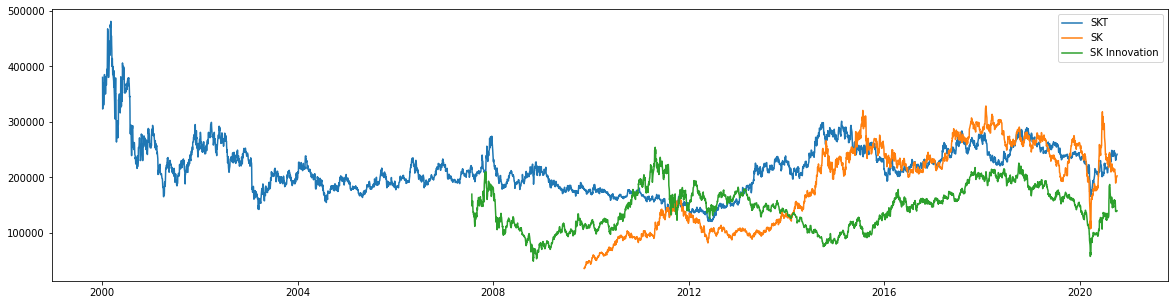

In [5]:
# SK그룹사(SKT/SK/SK Innovation) 주가 비교
fig = plt.figure(figsize=(20,5))
plt.plot(skt_df['Close'], label='SKT')
plt.plot(sk_df['Close'], label='SK')
plt.plot(skinno_df['Close'], label='SK Innovation')
plt.legend()
plt.show()

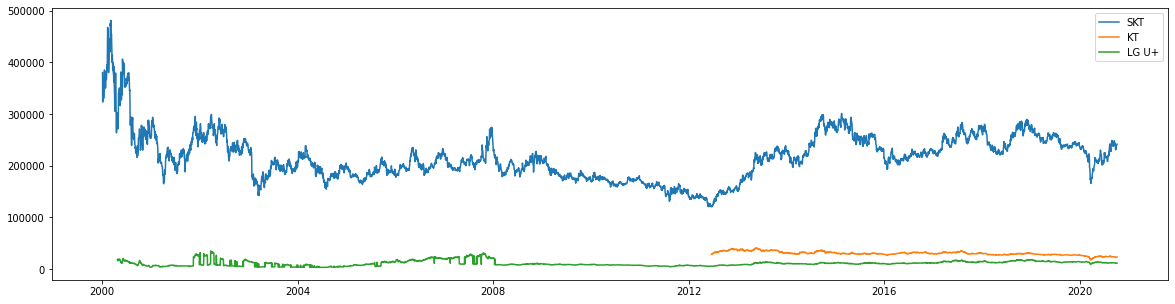

In [6]:
# 국내통신사 주가 비교(SKT vs KT vs LG U+)
fig = plt.figure(figsize=(20,5))
plt.plot(skt_df['Close'], label='SKT')
plt.plot(kt_df['Close'], label='KT')
plt.plot(lgu_df['Close'], label='LG U+')
plt.legend()
plt.show()

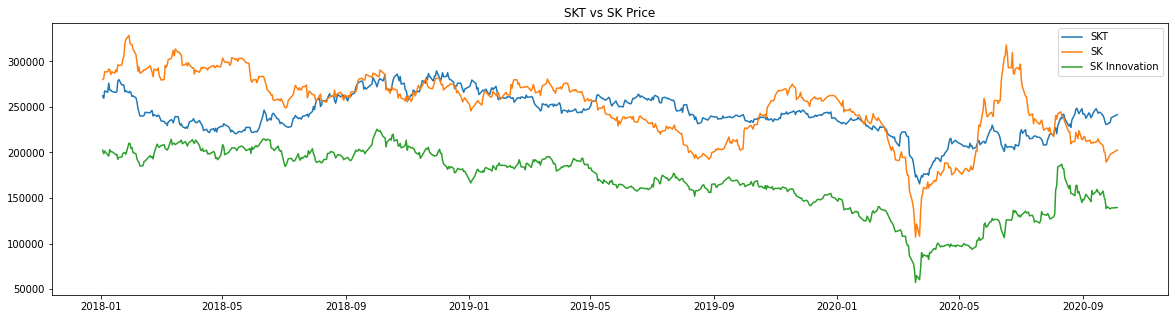

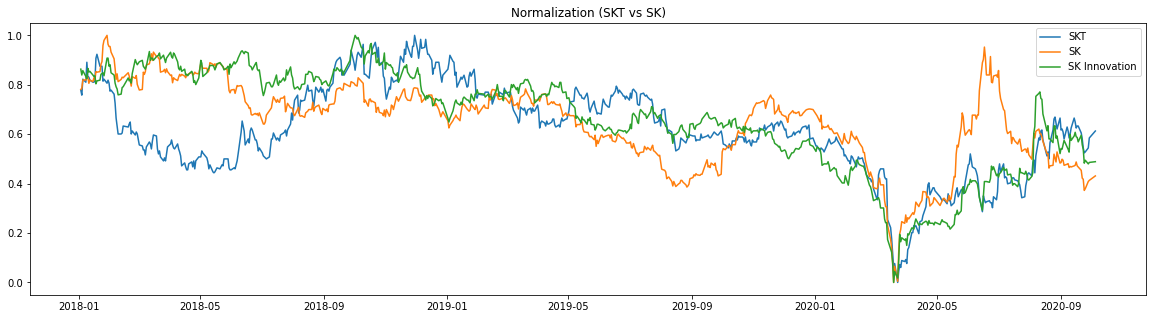

In [7]:
# SK그룹 주가 비교 (MinMax와 Normalization 활용한 비교)
starting_date='2018-01-01'

fig = plt.figure(figsize=(20,5))
plt.title("SKT vs SK Price")
plt.plot(skt_df[skt_df.index>=starting_date]['Close'], label='SKT')
plt.plot(sk_df[sk_df.index>=starting_date]['Close'], label='SK')
plt.plot(skinno_df[skinno_df.index>=starting_date]['Close'], label='SK Innovation')
plt.legend()
plt.show()

min_max_scaler = MinMaxScaler()
#fitted = min_max_scaler.fit(skt_df)
fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
skt_output = min_max_scaler.transform(skt_df)
skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))

#fitted = min_max_scaler.fit(sk_df)
fitted = min_max_scaler.fit(sk_df[sk_df.index>=starting_date])
sk_output = min_max_scaler.transform(sk_df)
sk_minmax = pd.DataFrame(sk_output, columns=sk_df.columns, index=list(sk_df.index.values))

fitted = min_max_scaler.fit(skinno_df[skinno_df.index>=starting_date])
skinno_output = min_max_scaler.transform(skinno_df)
skinno_minmax = pd.DataFrame(skinno_output, columns=skinno_df.columns, index=list(skinno_df.index.values))


fig = plt.figure(figsize=(20,5))
plt.title("Normalization (SKT vs SK)")
plt.plot(skt_minmax[skt_minmax.index>starting_date]['Close'], label='SKT')
plt.plot(sk_minmax[sk_minmax.index>starting_date]['Close'], label='SK')
plt.plot(skinno_minmax[skinno_minmax.index>starting_date]['Close'], label='SK Innovation')
plt.legend()
plt.show()

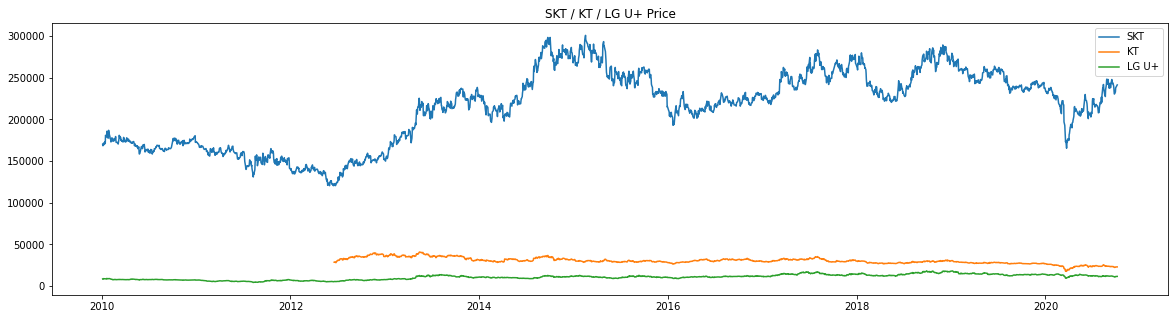

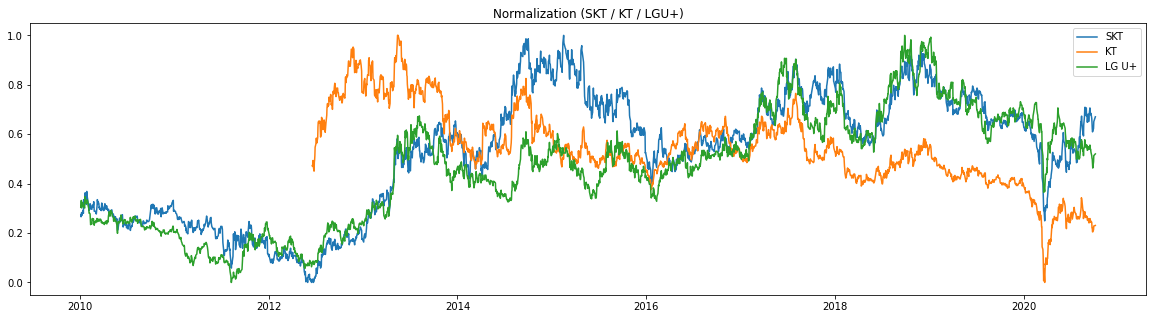

In [8]:
# 국내 통신 3사 주가 비교 (MinMax와 Normalization 활용한 비교)
starting_date='2010-01-01'

fig = plt.figure(figsize=(20,5))
plt.title("SKT / KT / LG U+ Price")
plt.plot(skt_df[skt_df.index>starting_date]['Close'], label='SKT')
plt.plot(kt_df[kt_df.index>starting_date]['Close'], label='KT')
plt.plot(lgu_df[lgu_df.index>starting_date]['Close'], label='LG U+')
plt.legend()
plt.show()


min_max_scaler = MinMaxScaler()
#fitted = min_max_scaler.fit(skt_df)
fitted = min_max_scaler.fit(skt_df[skt_df.index>=starting_date])
skt_output = min_max_scaler.transform(skt_df)
skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))

#fitted = min_max_scaler.fit(kt_df)
fitted = min_max_scaler.fit(kt_df[kt_df.index>=starting_date])
kt_output = min_max_scaler.transform(kt_df)
kt_minmax = pd.DataFrame(kt_output, columns=kt_df.columns, index=list(kt_df.index.values))

#fitted = min_max_scaler.fit(lgu_df)
fitted = min_max_scaler.fit(lgu_df[lgu_df.index>=starting_date])
lgu_output = min_max_scaler.transform(lgu_df)
lgu_minmax = pd.DataFrame(lgu_output, columns=lgu_df.columns, index=list(lgu_df.index.values))

fig = plt.figure(figsize=(20,5))
plt.title("Normalization (SKT / KT / LGU+)")
plt.plot(skt_minmax[skt_minmax.index>starting_date]['Close'], label='SKT')
plt.plot(kt_minmax[kt_minmax.index>starting_date]['Close'], label='KT')
plt.plot(lgu_minmax[lgu_minmax.index>starting_date]['Close'], label='LG U+')
plt.legend()
plt.show()

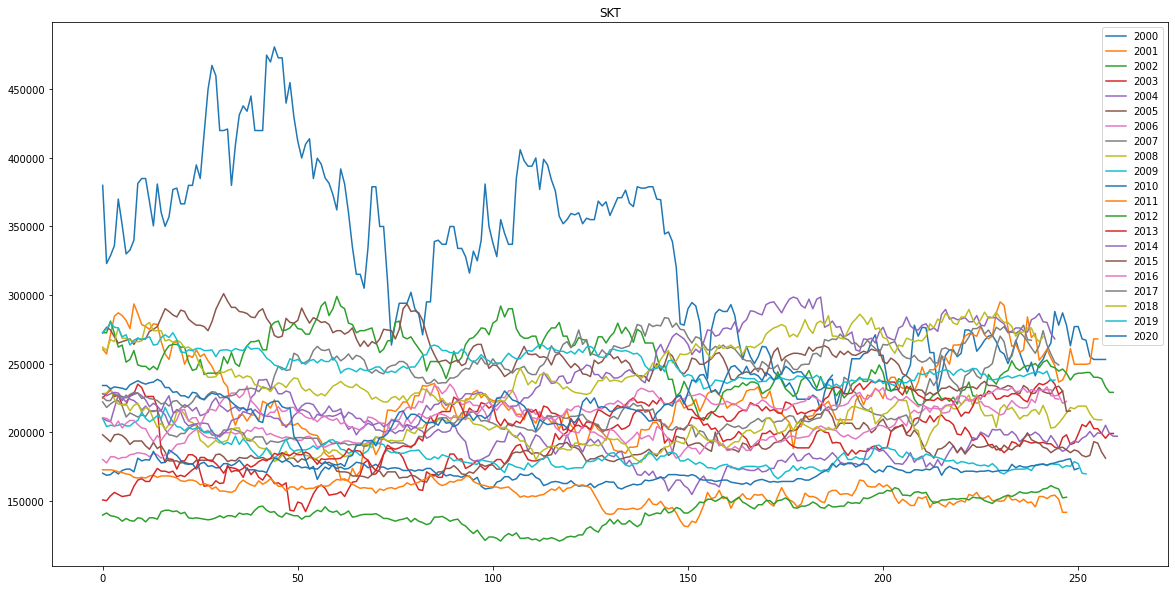

In [9]:
# SKT 년도별 변화 확인하기

# skt_df[ (skt_df.index>"2010-01-01") & (skt_df.index<"2011-01-01")]['Close']
# skt_df[skt_df.index>'2010-01-01']['Close']

start_year = start.year
end_year = end.year

fig = plt.figure(figsize=(20,10))
plt.title("SKT")
min_max_scaler = MinMaxScaler()

for i in range(start_year, end_year+1) :
  str_sdate = str(i)+"-01-01"
  str_edate = str(i+1)+"-01-01"
  # print(str_sdate, str_edate)
  df = skt_df[ (skt_df.index>str_sdate) & (skt_df.index<str_edate)]['Close']
  # fitted = min_max_scaler.fit(df)
  # skt_output = min_max_scaler.transform(df)
  # skt_minmax = pd.DataFrame(skt_output, columns=skt_df.columns, index=list(skt_df.index.values))

  # plt.plot(df.index.strftime("%m-%d"), df.values, label=str(i))
  #plt.plot(range(0,len(skt_minmax.values)), skt_minmax.values, label=str(i))
  plt.plot(range(0,len(df.values)), df.values, label=str(i))

plt.legend()
plt.show()

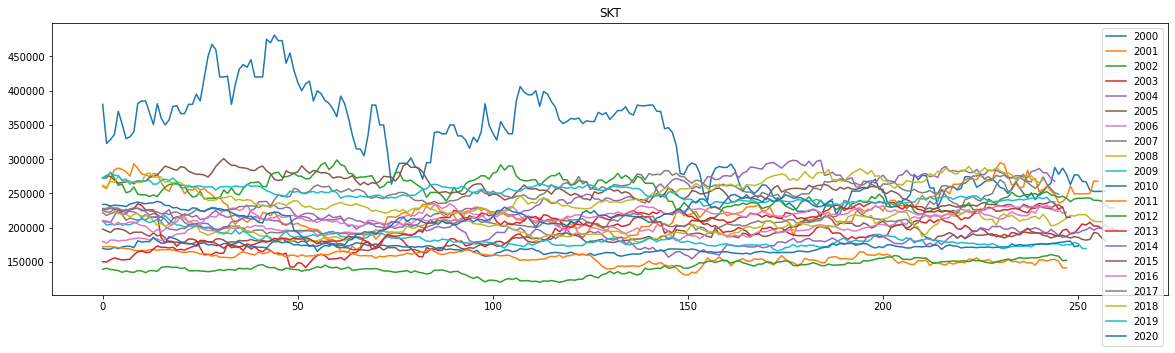

In [10]:
start_year = start.year
end_year = end.year

fig = plt.figure(figsize=(20,5))
plt.title("SKT")

for i in range(start_year, end_year+1) :
  str_sdate = str(i)+"-01-01"
  str_edate = str(i+1)+"-01-01"
  # print(str_sdate, str_edate)
  df = skt_df[ (skt_df.index>str_sdate) & (skt_df.index<str_edate)]['Close']
  # plt.plot(df.index.strftime("%m-%d"), df.values, label=str(i))
  plt.plot(range(0,len(df.values)), df.values, label=str(i))

plt.legend()
plt.show()

In [11]:
# 메일 발송 샘플
